In [1]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import numpy as np
import pandas as pd
airlines = pd.read_excel("Airlines+Data.xlsx")

In [ ]:
airlines.head(10)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [ ]:
airlines.shape

(96, 2)

In [ ]:
airlines.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [ ]:
from numpy import sqrt
airlines['Passengers'] = sqrt(airlines['Passengers'])
airlines.head()

,Month,Passengers,Months,Year
0,1,10.583005,Jan,1995
1,2,10.862780,Feb,1995
2,3,11.489125,Mar,1995
3,4,11.357817,Apr,1995
4,5,11.000000,May,1995


array([[<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Passengers'}>],
       [<Axes: title={'center': 'Year'}>, <Axes: >]], dtype=object)

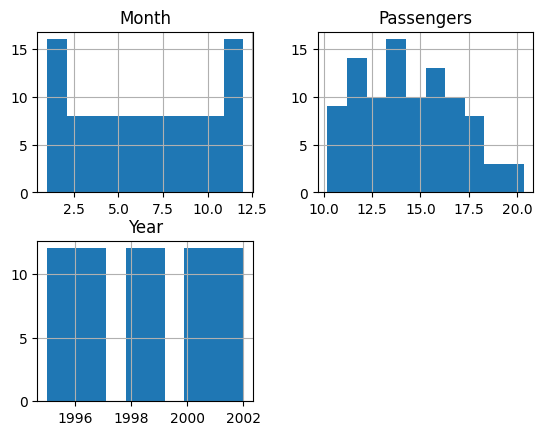

In [ ]:
airlines.hist()

<Axes: xlabel='Month', ylabel='Passengers'>

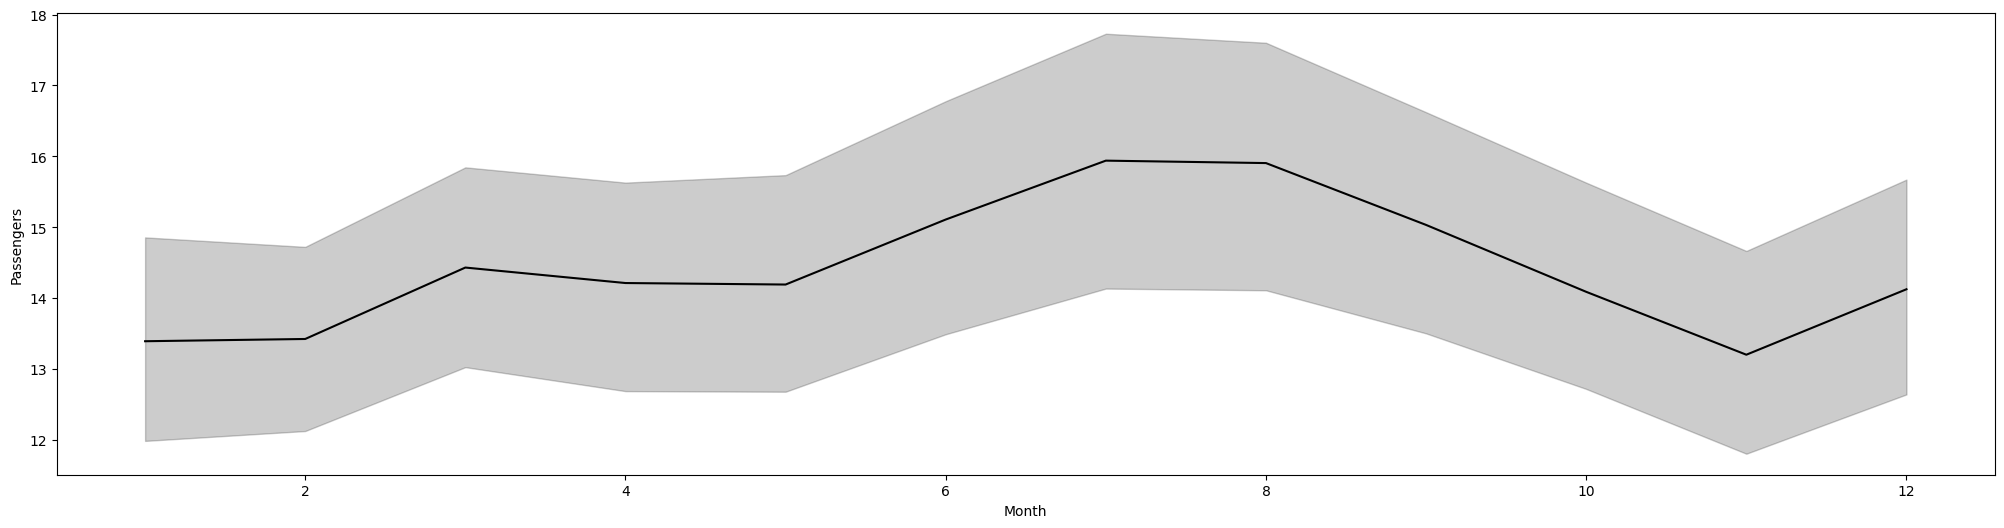

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(25,6))
sns.lineplot(x = "Month", y="Passengers", data=airlines, color='black')

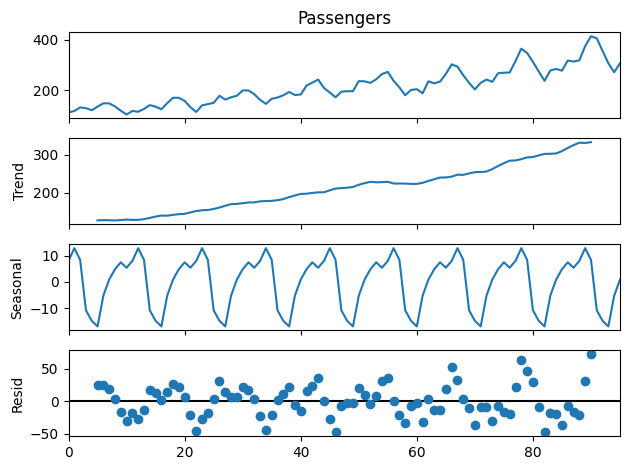

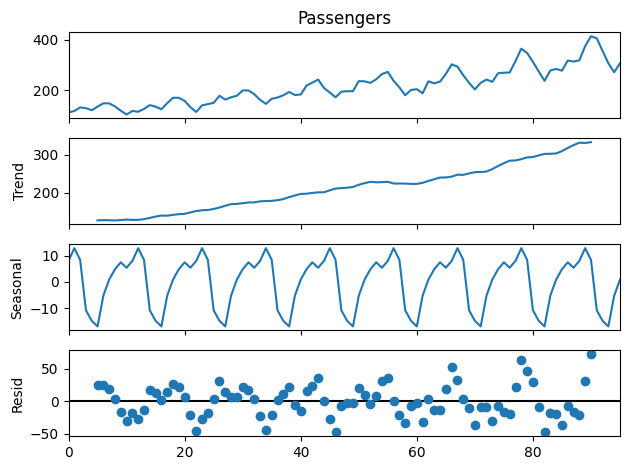

In [ ]:
import statsmodels.api as smf
seasonal = smf.tsa.seasonal_decompose(airlines["Passengers"],period=11)
seasonal.plot()

In [ ]:
airlines['Month'] = pd.to_datetime(airlines['Month'])
airlines['Months'] = airlines['Month'].dt.strftime('%b')
airlines.head(12)

,Month,Passengers,Months
0,1995-01-01,112,Jan
1,1995-02-01,118,Feb
2,1995-03-01,132,Mar
3,1995-04-01,129,Apr
4,1995-05-01,121,May
5,1995-06-01,135,Jun
6,1995-07-01,148,Jul
7,1995-08-01,148,Aug
8,1995-09-01,136,Sep
9,1995-10-01,119,Oct


In [ ]:
Months = ['Jan','Feb','Mar','Jun','Jul','Aug','Sep','Oct','Nov','Dec']


In [ ]:
dummies = pd.DataFrame(pd.get_dummies(airlines['Month']))
airlines1 = pd.concat([airlines,dummies],axis=1)
airlines1.head()

,Month,Passengers,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2002-03-01 00:00:00,2002-04-01 00:00:00,2002-05-01 00:00:00,2002-06-01 00:00:00,2002-07-01 00:00:00,2002-08-01 00:00:00,2002-09-01 00:00:00,2002-10-01 00:00:00,2002-11-01 00:00:00,2002-12-01 00:00:00
0,1995-01-01,112,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#  Complete the Data set
airlines1["t"] = np.array(98)
airlines1["t_squarted"] = airlines1["t"]*airlines1["t"]
airlines1["log_Passengers"] = np.array(airlines["Passengers"])
airlines1.columns
airlines1.head()

,Month,Passengers,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2002-06-01 00:00:00,2002-07-01 00:00:00,2002-08-01 00:00:00,2002-09-01 00:00:00,2002-10-01 00:00:00,2002-11-01 00:00:00,2002-12-01 00:00:00,t,t_squarted,log_Passengers
0,1995-01-01,112,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,98,9604,112
1,1995-02-01,118,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,98,9604,118
2,1995-03-01,132,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,98,9604,132
3,1995-04-01,129,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,98,9604,129
4,1995-05-01,121,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,98,9604,121


In [ ]:
Train = airlines1.head(75)
Test = airlines1.tail(26)

[]

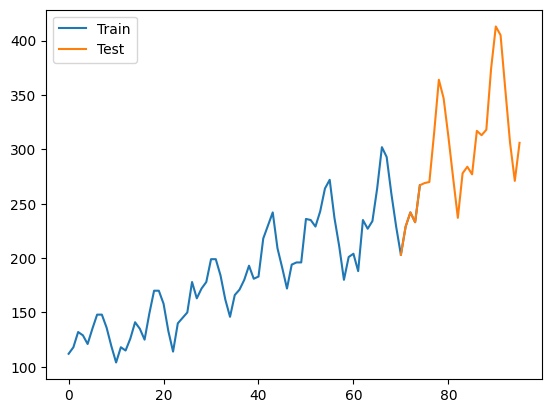

In [ ]:
#figsize = plt.figaspect(0.618)
#plt.figure(figsize=(12,8))
Train['Passengers'].plot(legend=True, label='Train'),
Test['Passengers'].plot(legend=True, label='Test');
plt.plot()

In [ ]:
import statsmodels.formula.api as smf
# Linear Model
linear = smf.ols('Passengers~t',data=Train).fit()
pred_linear = pd.Series(linear.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

125.26997774038652

In [ ]:
# Exponential
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Exp))**2))
rmse_Exp

125.26997774038652

In [ ]:
# Quadratic
Quad = sm.OLS(Train['Passengers'], sm.add_constant(Train[['t', 't_squared']])).fit()
pred_Quad = pd.Series(Quad.predict(Test[['t', 't_squared']]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

125.2699777403865

In [ ]:
data1 = {"MODEL": pd.Series(["rmse_linear", "rmse_Exp", "rmse_Quad"]),
         "RMSE_Values": pd.Series([rmse_linear,rmse_Exp,rmse_Quad])}
table_rmse = pd.DataFrame(data1)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,125.269978
1,rmse_Exp,125.269978
2,rmse_Quad,125.269978


In [ ]:
data = [['2003-01-01', 'Jan'], ['2003-02-01', 'Feb'], ['2003-03-01', 'Mar'],['2003-04-01', 'Apr'],['2003-5-01', 'May'],['2003-06-01', 'Jun'],
        ['2003-07-01', 'Jul'],['2003-08-01', 'Aug'],['2003-09-01', 'Sep'],['2003-10-01', 'Oct'],['2003-11-01', 'Nov'],['2003-12-01', 'Dec']]
forecast = pd.DataFrame(data, columns = ['Date', 'Months'])
forecast

,Date,Months
0,2003-01-01,Jan
1,2003-02-01,Feb
2,2003-03-01,Mar
3,2003-04-01,Apr
4,2003-5-01,May
5,2003-06-01,Jun
6,2003-07-01,Jul
7,2003-08-01,Aug
8,2003-09-01,Sep
9,2003-10-01,Oct


In [ ]:
dummies = pd.DataFrame(pd.get_dummies(forecast['Months']))
forecast1 = pd.concat([forecast,dummies],axis = 1)

forecast1["t"] = np.arange(1,13)
forecast1["t_squared"] = forecast1["t"]*forecast1["t"]
print("\nAfter Dummy, T and T-Square\n\n",forecast1.head())


After Dummy, T and T-Square

          Date Months  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  \
0  2003-01-01    Jan    0    0    0    0    1    0    0    0    0    0    0   
1  2003-02-01    Feb    0    0    0    1    0    0    0    0    0    0    0   
2  2003-03-01    Mar    0    0    0    0    0    0    0    1    0    0    0   
3  2003-04-01    Apr    1    0    0    0    0    0    0    0    0    0    0   
4   2003-5-01    May    0    0    0    0    0    0    0    0    1    0    0   

   Sep  t  t_squared  
0    0  1          1  
1    0  2          4  
2    0  3          9  
3    0  4         16  
4    0  5         25  


In [ ]:
# Forecasting using linear model

model_full = smf.ols('Passengers~t',data =airlines1).fit()
pred_new  = pd.Series(model_full.predict(forecast1))
forecast1["Forecasted"] = pd.Series(pred_new)
forecast1['Forecasted_Passengers'] = np.exp(forecast1['Forecasted'])

In [ ]:
# Final Prediction for next 12 months

Final_predict = forecast1.loc[:, ['Date', 'Forecasted_Passengers']]
Final_predict

,Date,Forecasted_Passengers
0,2003-01-01,9.049594e+00
1,2003-02-01,8.009314e+01
2,2003-03-01,7.088617e+02
3,2003-04-01,6.273757e+03
4,2003-5-01,5.552568e+04
5,2003-06-01,4.914282e+05
6,2003-07-01,4.349369e+06
7,2003-08-01,3.849395e+07
8,2003-09-01,3.406894e+08
9,2003-10-01,3.015261e+09


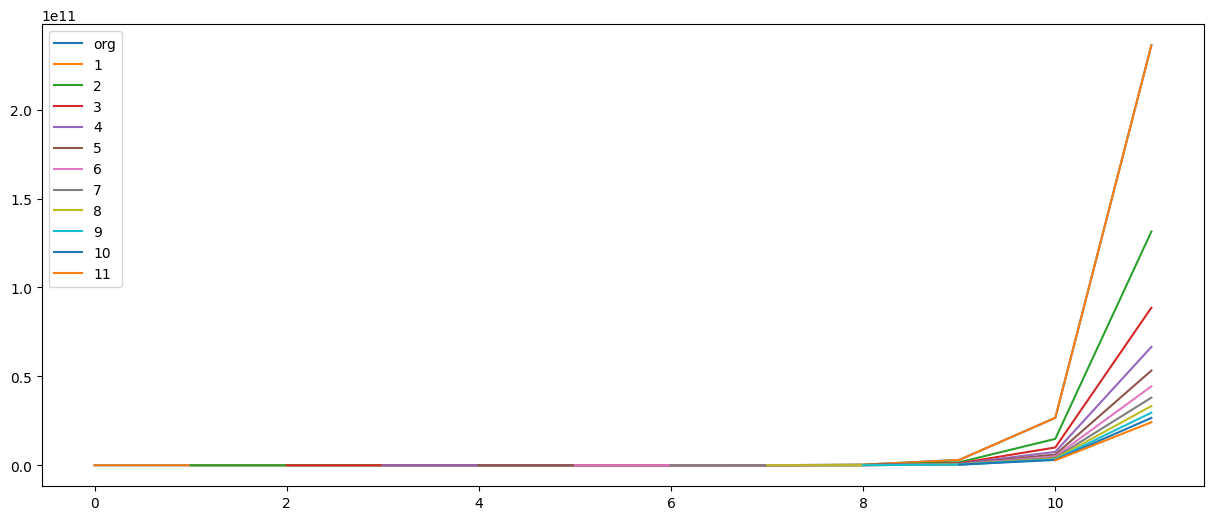

In [ ]:
plt.figure(figsize=(15,6))
Final_predict['Forecasted_Passengers'].plot(label='org')
for i in range(1,12):
  Final_predict["Forecasted_Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')